In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from random import sample

In [3]:
#ZUL FAUZI OKTAVIANSYAH
#2110181056

data = pd.read_csv('data.csv')
data

,x,y
0,4,53
1,5,63
2,10,59
3,9,77
4,13,49
...,...,...
70,66,23
71,61,25
72,76,27
73,72,31


In [4]:
tabel = np.array(data)
tabel
tabel2 = []
for i in range(len(tabel)):
    coba = (tabel[i][0], tabel[i][1])
    tabel2.append(coba)
tabel

array([[  4,  53],
       [  5,  63],
       [ 10,  59],
       [  9,  77],
       [ 13,  49],
       [ 13,  69],
       [ 12,  88],
       [ 15,  75],
       [ 18,  61],
       [ 19,  65],
       [ 22,  74],
       [ 27,  72],
       [ 28,  76],
       [ 24,  58],
       [ 27,  55],
       [ 28,  60],
       [ 30,  52],
       [ 31,  60],
       [ 32,  61],
       [ 36,  72],
       [ 28, 147],
       [ 32, 149],
       [ 35, 153],
       [ 33, 154],
       [ 38, 151],
       [ 41, 150],
       [ 38, 145],
       [ 38, 143],
       [ 32, 143],
       [ 34, 141],
       [ 44, 156],
       [ 44, 149],
       [ 44, 143],
       [ 46, 142],
       [ 47, 149],
       [ 49, 152],
       [ 50, 142],
       [ 53, 144],
       [ 52, 152],
       [ 55, 155],
       [ 54, 124],
       [ 60, 136],
       [ 63, 139],
       [ 86, 132],
       [ 85, 115],
       [ 85,  96],
       [ 78,  94],
       [ 74,  96],
       [ 97, 122],
       [ 98, 116],
       [ 98, 124],
       [ 99, 119],
       [ 99,

In [5]:
def generateRandom(k):
    sequence = [i for i in range(len(tabel))]
    subset = sample(sequence, k)
    return subset

In [6]:
def generateCentroid(k):
    
    subset = generateRandom(k)
    centroid =[]
    for i in range(len(subset)):
        centroid.append(tabel[subset[i]])
    
    return centroid

In [7]:
def getEuclidean(coordinate1, coordinate2):
    
    quadraticResult = 0
    
    for i in range(len(coordinate1)):
        quadraticResult += pow((coordinate1[i]-coordinate2[i]), 2)
    
    distance = pow(quadraticResult, 0.5)
    
    return distance

In [8]:
def determineIndexCentroid(data, centroid):
    
    index = 0
    
    for i in range(len(centroid)):
        if(i==0):
            minDistance = getEuclidean(data, centroid[i])
            index = i
        else:
            temp = getEuclidean(data, centroid[i])
            if(temp < minDistance):
                minDistance = temp
                index = i
    
    return index, minDistance

In [9]:
def determineCluster(centroid):
    cluster = []
    distance = []
    for i in range(len(tabel)):
        indexCluster = determineIndexCentroid(tabel[i], centroid)
        cluster.append(indexCluster[0])
        
        minDistance = indexCluster[1]
        distance.append(minDistance)
        
    return cluster, distance

In [10]:
def updateCentroid(oldCentroid, cluster):
    temp = (0,0)
    count = 0
    newCentroid = []

    for i in range(len(centroid)):
        for j in range(len(cluster)):
            if(cluster[j]==i):
                temp += tabel[j]
                count+=1
        temp = temp / count
        newCentroid.append(temp)
        temp = (0,0)
        count = 0
    
    return newCentroid

In [11]:
def separateByCentroid(cluster):
    separated = {}
    
    for i in range(len(cluster)):
        vector = cluster[i]
        if (vector not in separated):
            separated[vector] = []
        separated[vector].append(tabel2[i])
    
    
    return separated

In [12]:
isChanged = True
k = 6
centroid = np.array(generateCentroid(k))
cluster = []
distance = []
print(centroid)

while(isChanged):
    temp = determineCluster(centroid)
    if(cluster != temp[0]):
        cluster = temp[0]
        distance = temp[1]
        centroid = updateCentroid(centroid, cluster)
        isChanged = True
    else:
        isChanged = False
    

[[108 111]
 [101 115]
 [117 115]
 [ 31  60]
 [ 98 116]
 [ 15  75]]


In [13]:
centroid

[array([ 95.375, 121.375]),
 array([79.        , 95.33333333]),
 array([111.5, 116. ]),
 array([68.93333333, 19.4       ]),
 array([ 43.91304348, 146.04347826]),
 array([20.15, 64.95])]

In [14]:
cluster

[5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3]

In [15]:
clusterData =separateByCentroid(cluster)

In [16]:
clusterData

{5: [(4, 53),
  (5, 63),
  (10, 59),
  (9, 77),
  (13, 49),
  (13, 69),
  (12, 88),
  (15, 75),
  (18, 61),
  (19, 65),
  (22, 74),
  (27, 72),
  (28, 76),
  (24, 58),
  (27, 55),
  (28, 60),
  (30, 52),
  (31, 60),
  (32, 61),
  (36, 72)],
 4: [(28, 147),
  (32, 149),
  (35, 153),
  (33, 154),
  (38, 151),
  (41, 150),
  (38, 145),
  (38, 143),
  (32, 143),
  (34, 141),
  (44, 156),
  (44, 149),
  (44, 143),
  (46, 142),
  (47, 149),
  (49, 152),
  (50, 142),
  (53, 144),
  (52, 152),
  (55, 155),
  (54, 124),
  (60, 136),
  (63, 139)],
 0: [(86, 132),
  (85, 115),
  (97, 122),
  (98, 116),
  (98, 124),
  (99, 119),
  (99, 128),
  (101, 115)],
 1: [(85, 96), (78, 94), (74, 96)],
 2: [(108, 111), (110, 111), (108, 116), (111, 126), (115, 117), (117, 115)],
 3: [(70, 4),
  (77, 12),
  (83, 21),
  (61, 15),
  (69, 15),
  (78, 16),
  (66, 18),
  (58, 13),
  (64, 20),
  (69, 21),
  (66, 23),
  (61, 25),
  (76, 27),
  (72, 31),
  (64, 30)]}

In [17]:
data["cluster"] = cluster
data["distance"] = distance

In [18]:
data

,x,y,cluster,distance
0,4,53,5,20.090421
1,5,63,5,15.274980
2,10,59,5,11.765415
3,9,77,5,16.417217
4,13,49,5,17.479273
...,...,...,...,...
70,66,23,3,4.643753
71,61,25,3,9.710704
72,76,27,3,10.377754
73,72,31,3,11.998518


In [19]:
data_x = np.array(data)[:, :-2]

In [20]:
data_x

array([[  4.,  53.],
       [  5.,  63.],
       [ 10.,  59.],
       [  9.,  77.],
       [ 13.,  49.],
       [ 13.,  69.],
       [ 12.,  88.],
       [ 15.,  75.],
       [ 18.,  61.],
       [ 19.,  65.],
       [ 22.,  74.],
       [ 27.,  72.],
       [ 28.,  76.],
       [ 24.,  58.],
       [ 27.,  55.],
       [ 28.,  60.],
       [ 30.,  52.],
       [ 31.,  60.],
       [ 32.,  61.],
       [ 36.,  72.],
       [ 28., 147.],
       [ 32., 149.],
       [ 35., 153.],
       [ 33., 154.],
       [ 38., 151.],
       [ 41., 150.],
       [ 38., 145.],
       [ 38., 143.],
       [ 32., 143.],
       [ 34., 141.],
       [ 44., 156.],
       [ 44., 149.],
       [ 44., 143.],
       [ 46., 142.],
       [ 47., 149.],
       [ 49., 152.],
       [ 50., 142.],
       [ 53., 144.],
       [ 52., 152.],
       [ 55., 155.],
       [ 54., 124.],
       [ 60., 136.],
       [ 63., 139.],
       [ 86., 132.],
       [ 85., 115.],
       [ 85.,  96.],
       [ 78.,  94.],
       [ 74.,

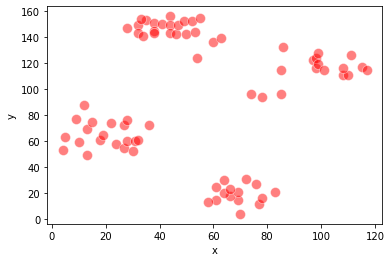

In [21]:
sns.scatterplot(x="x", y="y", data=data, s=100, color="red", alpha = 0.5)

In [22]:
cnt = np.array(centroid)

In [23]:
cnt

array([[ 95.375     , 121.375     ],
       [ 79.        ,  95.33333333],
       [111.5       , 116.        ],
       [ 68.93333333,  19.4       ],
       [ 43.91304348, 146.04347826],
       [ 20.15      ,  64.95      ]])

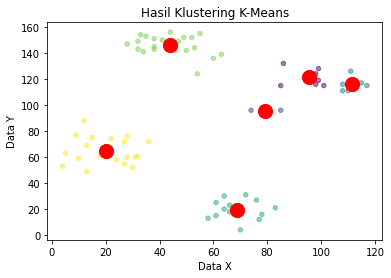

In [24]:
fig, ax = plt.subplots()
sct = ax.scatter(data_x[:,0], data_x[:,1], s = 20, c = cluster, marker = "o", alpha = 0.5)

centers = cnt
ax.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1)
plt.title("Hasil Klustering K-Means")
plt.xlabel("Data X")
plt.ylabel("Data Y")
plt.show()

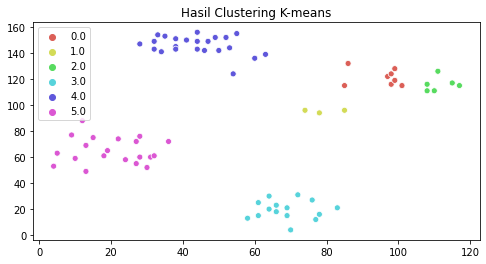

In [25]:
cl = np.array(data)[:, 2]

plt.figure(figsize=(8,4))
sns.scatterplot(data_x[:,0], data_x[:,1], hue=cl,
                palette=sns.color_palette('hls', k))

plt.title('Hasil Clustering K-means')
plt.show()